In [1]:
#Importing required Python packages 
import matplotlib.pylab as plt 
import numpy as np 
import torch
import torch.nn as nn
import torch.nn.functional as F

# %matplotlib tk
%matplotlib inline

In [2]:
#Define a simple range of values for x and reshape so sklearn likes it.
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - 1.

In [3]:
# x = x[:, np.newaxis]
# y = y[:, np.newaxis]

In [4]:
xy  = np.c_[x,y]
# xy

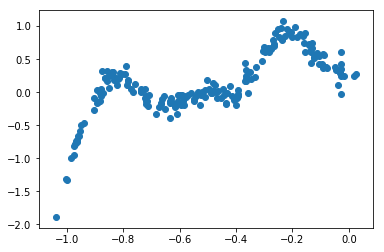

In [5]:
# %matplotlib inline
plt.scatter(x, y)

In [6]:
import pwlf
PWLF = pwlf.PiecewiseLinFit(x, y)
xx = np.linspace(min(x), max(x), num=200)

5
[-1.03740041 -0.85441271 -0.68325101 -0.39519568 -0.23227317  0.02385823]


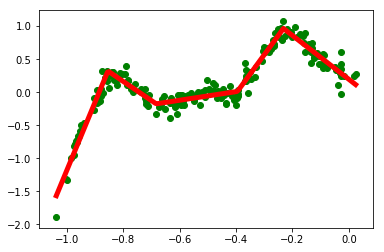

In [7]:
pieces = 5
print(pieces)

# res = PWLF.fitfast(pieces)
res = PWLF.fit(pieces)
print(res)
yy = PWLF.predict(xx)

## PLOTTING THE DATA WITH FITTED CURVE
# %matplotlib tk
plt.scatter(x, y, c='g')
plt.plot(xx, yy, 'r', lw=5)

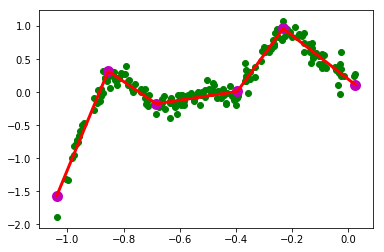

In [8]:
#plotting the end points
plt.scatter(x, y, c='g')
plt.plot(xx, yy, 'r', lw=3)

plt.scatter(res, PWLF.predict(res), lw=5, c='m')

In [9]:
# This piecewise can be converted to relu neural network
n_pieces = 5
resy = PWLF.predict(res)
break_pts = np.c_[res, resy]
break_pts

array([[-1.03740041, -1.56457162],
       [-0.85441271,  0.32098111],
       [-0.68325101, -0.1750118 ],
       [-0.39519568,  0.01271187],
       [-0.23227317,  0.96500032],
       [ 0.02385823,  0.11598705]])

In [10]:
W1 = PWLF.calc_slopes()
print('W1 = \n',W1)

W1_ = np.copy(W1)
for i in range(1, len(W1)):
#     print(i)
    W1[i] = W1_[i] - W1_[i-1]
print('updated W1 = \n',W1)

b1 = -res[:-1]*W1
print('b1 = \n',b1)

b2 = resy[0]

W1 = 
 [10.30425967 -2.89780306  0.65169305  5.8450392  -3.31475671]
updated W1 = 
 [ 10.30425967 -13.20206273   3.54949611   5.19334614  -9.15979591]
b1 = 
 [ 10.6896432  -11.28001025   2.42519681   2.05238794  -2.1275748 ]


In [11]:
# More NN way of function
W2 = np.sign(W1)
W1_ = np.abs(W1)
b1_ = b1*W2
z1 = np.matmul(xx[:,np.newaxis],W1_[np.newaxis, :]) + b1_
a1 = np.maximum(0, z1)# + resy[0]
z2 = np.matmul(a1, W2[:, np.newaxis]) + b2

# # ALTERNATIVE to above method
# z1 =np.matmul(xx[:,np.newaxis],W1[np.newaxis, :]) + b1
# a1 = np.maximum(0, W2 * z1)# + resy[0]
# z2 = np.matmul(a1, W2[:, np.newaxis]) + b2

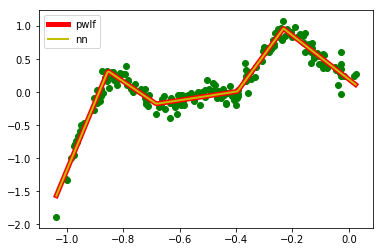

In [12]:
plt.scatter(x, y, c='g')
plt.plot(xx, yy, 'r', lw=5, label='pwlf')
# plt.plot(xx, a1[:,0] + a1[:,1] + resy[0]) # used during testing
plt.plot(xx, z2, 'y-', lw=2, label='nn')
plt.legend()

In [463]:
# define parameters
dt = torch.float32
W1t = torch.from_numpy(W1_.reshape(1,-1)).type(dt)
W1t.requires_grad = True
b1t = torch.from_numpy(b1_).type(dt)
b1t.requires_grad = True
W2t = torch.from_numpy(W2.reshape(-1, 1)).type(dt)
W2t.requires_grad = True
b2t = torch.from_numpy(np.array([b2])).type(dt)
b2t.requires_grad = True
# print(b2t)

params = [W1t, b1t, W2t, b2t]
optimizer = torch.optim.Adam(params, lr=0.03)

dt = torch.float32
X_data = torch.from_numpy(x.reshape(-1,1)).type(dt)
XX_data = torch.from_numpy(xx.reshape(-1,1)).type(dt)
# Y_data = torch.from_numpy(y.reshape(-1,1)).type(dt)

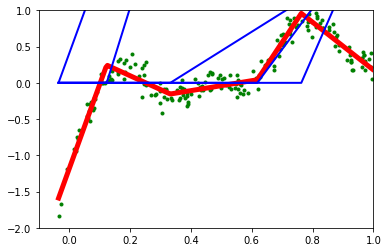

In [469]:
%matplotlib inline
Z1 = XX_data.mm(W1t) + b1t
A1 = F.relu(Z1)
pred = A1.mm(W2t) + b2t
plt.xlim(-0.1,1)
plt.ylim(-2,1)
plt.scatter(x, y, marker='.', c='g')
plt.plot(xx, pred.data.numpy(), 'r', lw=5)
for out in A1.data.numpy().T:
    plt.plot(xx, out, 'b', lw=2)

_______________________
epoch 0
Weight 1 
 tensor([[11.0753, 13.1281,  2.7722,  5.7184,  9.6712]])
Biases 1 
 tensor([ 0.3830, -1.6254, -0.9228, -3.5369, -7.3822])
Weight 2 
 tensor([[ 1.0474],
        [-1.0288],
        [ 0.9354],
        [ 0.9862],
        [-0.9949]])
Biases 2 
 tensor([-1.5928])
Loss 0.013691876083612442


_______________________
epoch 1000
Weight 1 
 tensor([[11.0626, 13.1178,  2.7780,  5.7203,  9.6725]])
Biases 1 
 tensor([ 0.3820, -1.6245, -0.9236, -3.5387, -7.3827])
Weight 2 
 tensor([[ 1.0500],
        [-1.0308],
        [ 0.9370],
        [ 0.9885],
        [-0.9959]])
Biases 2 
 tensor([-1.5927])
Loss 0.013716143555939198


_______________________
epoch 2000
Weight 1 
 tensor([[11.0431, 13.1026,  2.7821,  5.7224,  9.6737]])
Biases 1 
 tensor([ 0.3814, -1.6223, -0.9258, -3.5400, -7.3836])
Weight 2 
 tensor([[ 1.0508],
        [-1.0314],
        [ 0.9334],
        [ 0.9867],
        [-0.9954]])
Biases 2 
 tensor([-1.5927])
Loss 0.013691626489162445


__________

TclError: this isn't a Tk application

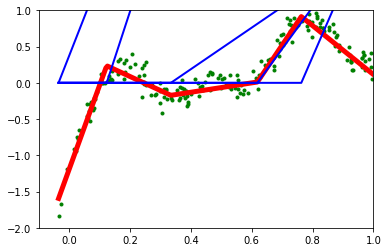

In [471]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(1000000):
    Z1 = X_data.mm(W1t) + b1t
    A1 = Z1.clamp(min=0)

    pred = A1.mm(W2t) + b2t

    optimizer.zero_grad()
    loss = F.mse_loss(pred, Y_data)
    loss.backward()
    optimizer.step()

    if step % 1000 == 0:

        print('_______________________')
        print("epoch", step)

        print("Weight 1", '\n', W1t.data)
        print("Biases 1", '\n', b1t.data)
        print("Weight 2", '\n', W2t.data)
        print("Biases 2", '\n', b2t.data)
        # print("Linearity\n", v1.eval())

        losses = float(loss)
        print("Loss", losses)

        # print('sorted ', sess.run(a1z, feed_dict={xs: x_data, ys: y_data}))

        ax.clear()
        ax.scatter(x, y, marker='.', c='g')
        Z1 = XX_data.mm(W1t) + b1t
        A1 = Z1.clamp(min=0)
        pred = A1.mm(W2t) + b2t
        plt.xlim(-0.1,1)
        plt.ylim(-2,1)
        plt.scatter(x, y, marker='.', c='g')
        plt.plot(xx, pred.data.numpy(), 'r', lw=5)
        for out in A1.data.numpy().T:
            plt.plot(xx, out, 'b', lw=2)

        fig.canvas.draw()
        plt.pause(0.001)
        print("\n")
        if losses < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

In [ ]:
# New type of relu
# i.e Piecewise Relu Network With Linear Independence

